In [1]:
install.packages("spotifyr")

also installing the dependencies ‘snakecase’, ‘janitor’


Warning message:
“unable to access index for repository https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6/PACKAGES'”
installing the source packages ‘snakecase’, ‘janitor’, ‘spotifyr’




In [1]:
Sys.setenv(SPOTIFY_CLIENT_ID = "4897f93fed274f22ae0ab93206c86b68")
Sys.setenv(SPOTIFY_CLIENT_SECRET = "84f21d258b0b4d0a8e2ecf9f077e1204")

In [2]:
library(spotifyr)
library(tidyverse)
library(dplyr)
library(knitr)
library(rvest)
library(tidyverse)
library(ggridges)

access_token <- get_spotify_access_token()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.2
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [3]:
## How has the energy of RHCP music changed over time?
## Is the energy of a RHCP album correlated with its album sales?

In [4]:
rhcp <- get_artist_audio_features('red hot chili peppers')

In [5]:
head(rhcp)

,artist_name,artist_id,album_id,album_type,album_images,album_release_date,album_release_year,album_release_date_precision,danceability,energy,⋯,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
,<chr>,<chr>,<chr>,<chr>,<list>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.573,0.913,⋯,Tippa My Tongue,https://p.scdn.co/mp3-preview/b8201773e1af3c5fdaa321fb34cf9e75756d82ba?cid=4897f93fed274f22ae0ab93206c86b68,1,track,spotify:track:7BCxIjRsqbc9Yiy2haBCIK,https://open.spotify.com/track/7BCxIjRsqbc9Yiy2haBCIK,Return of the Dream Canteen,F,minor,F minor
2,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.680,0.679,⋯,Peace and Love,https://p.scdn.co/mp3-preview/a93ec9ed459cf4c2fe6c80b5c1141d0ed10da67a?cid=4897f93fed274f22ae0ab93206c86b68,2,track,spotify:track:3W2reBya7FkjHCP1B2nmQr,https://open.spotify.com/track/3W2reBya7FkjHCP1B2nmQr,Return of the Dream Canteen,A#,major,A# major
3,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.663,0.710,⋯,Reach Out,https://p.scdn.co/mp3-preview/eccd28cee4146ab727693a9bd3119b056c897407?cid=4897f93fed274f22ae0ab93206c86b68,3,track,spotify:track:00B7SBwrjbycLMOgAmeIU8,https://open.spotify.com/track/00B7SBwrjbycLMOgAmeIU8,Return of the Dream Canteen,B,minor,B minor
4,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.515,0.809,⋯,Eddie,https://p.scdn.co/mp3-preview/2146a69931d60eb834c8a41315ee7d962567325b?cid=4897f93fed274f22ae0ab93206c86b68,4,track,spotify:track:0G1BEi8ByngMCJqcPnDACw,https://open.spotify.com/track/0G1BEi8ByngMCJqcPnDACw,Return of the Dream Canteen,A,minor,A minor
5,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.599,0.777,⋯,Fake as Fu@k,https://p.scdn.co/mp3-preview/0c6b456dfc40827ab2da4dab414dd029fae2e034?cid=4897f93fed274f22ae0ab93206c86b68,5,track,spotify:track:7cpC2EuFMexgy392K13RZb,https://open.spotify.com/track/7cpC2EuFMexgy392K13RZb,Return of the Dream Canteen,G#,minor,G# minor
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.492,0.815,⋯,Bella,https://p.scdn.co/mp3-preview/10379f8e3e11558025d68f9ef26be4033493cca6?cid=4897f93fed274f22ae0ab93206c86b68,6,track,spotify:track:2dbA4sPwu3iK72c0mA6907,https://open.spotify.com/track/2dbA4sPwu3iK72c0mA6907,Return of the Dream Canteen,G

In [6]:
## Average energy by album
album.energy <- rhcp %>% 
  group_by(album_name) %>% 
  summarise(energy = mean(energy), release = mean(album_release_year)) 

In [7]:
## Remove non-deluxe versions of repeated albums
album.energy2 <- subset(album.energy,
                          !album_name %in% c("One Hot Minute", 
                                             "Californication",
                                             "By the Way"))
album.energy2

album_name,energy,release
<chr>,<dbl>,<dbl>
Blood Sugar Sex Magik (Deluxe Edition),0.7528421,1991
By the Way (Deluxe Edition),0.8266667,2002
Californication (Deluxe Edition),0.8450000,1999
Freaky Styley,0.8505556,1985
I'm with You,0.8624286,2011
Mother's Milk,0.9309474,1989
One Hot Minute (Deluxe Edition),0.7637500,1995
Red Hot Chili Peppers,0.8293125,1984
Return of the Dream Canteen,0.7112353,2022


In [8]:
## Ordered from earliest to latest
energy.ordered <- 
  album.energy2[order(album.energy2$release, decreasing = F),]
energy.ordered

album_name,energy,release
<chr>,<dbl>,<dbl>
Red Hot Chili Peppers,0.8293125,1984
Freaky Styley,0.8505556,1985
The Uplift Mofo Party Plan,0.9155833,1987
Mother's Milk,0.9309474,1989
Blood Sugar Sex Magik (Deluxe Edition),0.7528421,1991
One Hot Minute (Deluxe Edition),0.7637500,1995
Californication (Deluxe Edition),0.8450000,1999
By the Way (Deluxe Edition),0.8266667,2002
Stadium Arcadium,0.7801034,2006


In [9]:
## Ordered from most energy to least
album.energy2[order(album.energy2$energy, decreasing = T),]
## 3 of the 4 most energetic albums were released in the 80s, before they were 
## mainstream.


album_name,energy,release
<chr>,<dbl>,<dbl>
Mother's Milk,0.9309474,1989
The Uplift Mofo Party Plan,0.9155833,1987
I'm with You,0.8624286,2011
Freaky Styley,0.8505556,1985
Californication (Deluxe Edition),0.8450000,1999
Red Hot Chili Peppers,0.8293125,1984
By the Way (Deluxe Edition),0.8266667,2002
Stadium Arcadium,0.7801034,2006
One Hot Minute (Deluxe Edition),0.7637500,1995


In [10]:
## Top 5 energy tracks
rhcp %>% 
  arrange(-energy) %>% 
  select(track_name, energy, album_release_year) %>% 
  head(5)
## All of the 5 most energetic tracks released by the RHCP
## were released in the 80s.

,track_name,energy,album_release_year
,<chr>,<dbl>,<dbl>
1,Catholic School Girls Rule - Remastered,0.998,1985
2,Subway To Venus - Remastered,0.997,1989
3,"Johnny, Kick A Hole In The Sky - Remastered",0.997,1989
4,Me And My Friends,0.996,1987
5,Freaky Styley - Remastered,0.996,1985


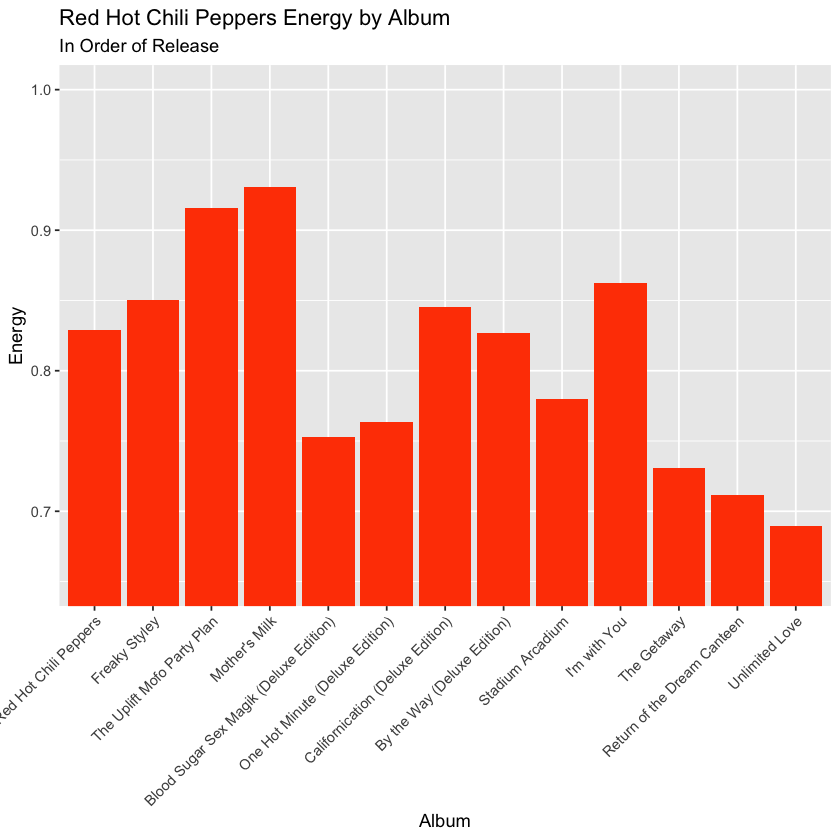

In [11]:
## Plot release vs energy
ggplot(energy.ordered, aes(x = reorder(album_name, release), y = energy)) +
  geom_bar(stat = "identity", fill = "orangered") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Album") +
  ylab("Energy") +
  coord_cartesian(ylim = c(0.65,1)) +
  ggtitle("Red Hot Chili Peppers Energy by Album",
          subtitle = "In Order of Release")

Picking joint bandwidth of 0.0645



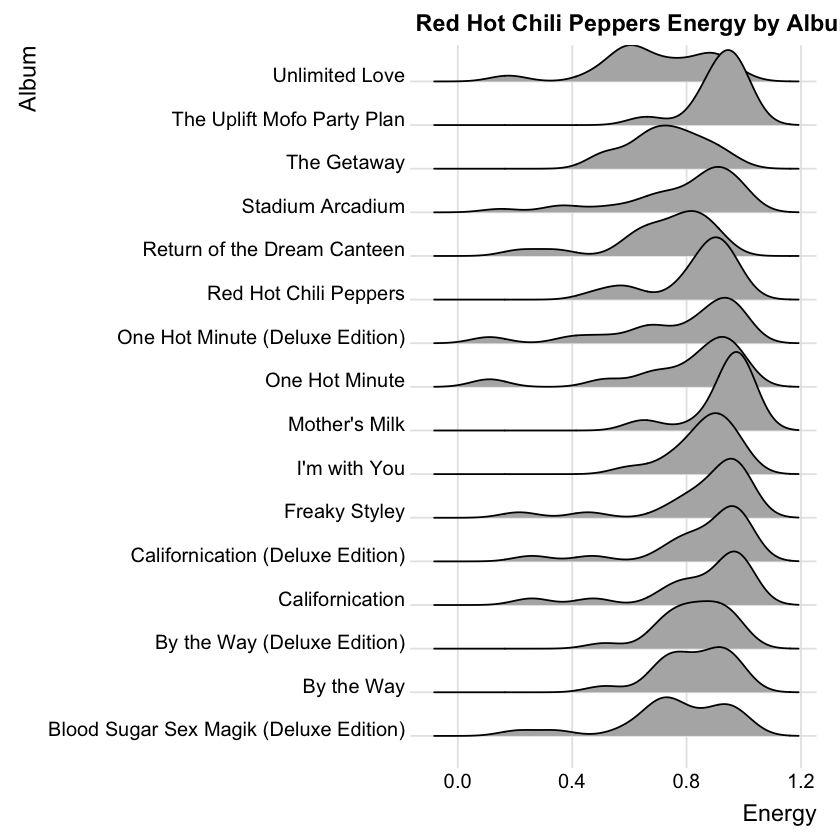

In [12]:
## Density plot of album energy
ggplot(rhcp, aes(x = energy, y = album_name)) + 
  geom_density_ridges() + 
  theme_ridges() +
  xlab("Energy") +
  ylab("Album") +
  ggtitle("Red Hot Chili Peppers Energy by Album")

In [13]:
## Album dataframe
rhcp.albums <- subset(get_artist_albums('0L8ExT028jH3ddEcZwqJJ5'), 
                      album_type == 'album')
head(rhcp.albums)

,album_group,album_type,artists,available_markets,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri,external_urls.spotify
,<chr>,<chr>,<list>,<list>,<chr>,<chr>,<list>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,album,album,"https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5, 0L8ExT028jH3ddEcZwqJJ5 , Red Hot Chili Peppers , artist , spotify:artist:0L8ExT028jH3ddEcZwqJJ5 , https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5","AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY, CZ, DK, DO, DE, EC, EE, SV, FI, FR, GR, GT, HN, HK, HU, IS, IE, IT, LV, LT, LU, MY, MT, MX, NL, NZ, NI, NO, PA, PY, PE, PH, PL, PT, SG, SK, ES, SE, CH, TW, TR, UY, US, GB, AD, LI, MC, ID, JP, TH, VN, RO, IL, ZA, SA, AE, BH, QA, OM, KW, EG, MA, DZ, TN, LB, JO, PS, IN, KZ, MD, UA, AL, BA, HR, ME, MK, RS, SI, KR, BD, PK, LK, GH, KE, NG, TZ, UG, AG, AM, BS, BB, BZ, BT, BW, BF, CV, CW, DM, FJ, GM, GE, GD, GW, GY, HT, JM, KI, LS, LR, MW, MV, ML, MH, FM, NA, NR, NE, PW, PG, WS, SM, ST, SN, SC, SL, SB, KN, LC, VC, SR, TL, TO, TT, TV, VU, AZ, BN, BI, KH, CM, TD, KM, GQ, SZ, GA, GN, KG, LA, MO, MR, MN, NP, RW, TG, UZ, ZW, BJ, MG, MU, MZ, AO, CI, DJ, ZM, CD, CG, IQ, LY, TJ, VE, ET, XK",https://api.spotify.com/v1/albums/0KJc9ksnoJJsdpQxV3z5i1,0KJc9ksnoJJsdpQxV3z5i1,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",Return of the Dream Canteen,2022-10-14,day,17,album,spotify:album:0KJc9ksnoJJsdpQxV3z5i1,https://open.spotify.com/album/0KJc9ksnoJJsdpQxV3z5i1
2,album,album,"https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5, 0L8ExT028jH3ddEcZwqJJ5 , Red Hot Chili Peppers , artist , spotify:artist:0L8ExT028jH3ddEcZwqJJ5 , https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5","AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY, CZ, DK, DO, DE, EC, EE, SV, FI, FR, GR, GT, HN, HK, HU, IS, IE, IT, LV, LT, LU, MY, MT, MX, NL, NZ, NI, NO, PA, PY, PE, PH, PL, PT, SG, SK, ES, SE, CH, TW, TR, UY, US, GB, AD, LI, MC, ID, JP, TH, VN, RO, IL, ZA, SA, AE, BH, QA, OM, KW, EG, MA, DZ, TN, LB, JO, PS, IN, KZ, MD, UA, AL, BA, HR, ME, MK, RS, SI, KR, BD, PK, LK, GH, KE, NG, TZ, UG, AG, AM, BS, BB, BZ, BT, BW, BF, CV, CW, DM, FJ, GM, GE, GD, GW, GY, HT, JM, KI, LS, LR, MW, MV, ML, MH, FM, NA, NR, NE, PW, PG, WS, SM, ST, SN, SC, SL, SB, KN, LC, VC, SR, TL, TO, TT, TV, VU, AZ, BN, BI, KH, CM, TD, KM, GQ, SZ, GA, GN, KG, LA, MO, MR, MN, NP, RW, TG, UZ, ZW, BJ, MG, MU, MZ, AO, CI, DJ, ZM, CD, CG, IQ, LY, TJ, VE, ET, XK",https://api.spotify.com/v1/albums/2ITVvrNiINKRiW7wA3w6w6,2ITVvrNiINKRiW7wA3w6w6,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b27397a52e0aeda9d95fb881c56d, https://i.scdn.co/image/ab67616d00001e0297a52e0aeda9d95fb881c56d, https://i.scdn.co/image/ab67616d0000485197a52e0aeda9d95fb881c56d, 640 , 300 , 64",Unlimited Love,2022-04-01,day,17,album,spotify:album:2ITVvrNiINKRiW7wA3w6w6,https://open.spotify.com/album/2ITVvrNiINKRiW7wA3w6w6
3,album,album,"https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5, 0L8ExT028jH3ddEcZwqJJ5 , Red Hot Chili Peppers , artist , spotify:artist:0L8ExT028jH3ddEcZwqJJ5 , https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5","AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY, CZ, DK, DO, DE, EC, EE, SV, FI, FR, GR, GT, HN, HK, HU, IS, IE, IT, LV, LT, LU, MY, MT, MX, NL, NZ, NI, NO, PA, PY, PE, PH, PL, PT, SG, SK, ES, SE, CH, TW, TR, UY, US, GB, AD, LI, MC, ID, JP, TH, VN, RO, IL, ZA, SA, AE, BH, QA, OM, KW, EG, MA, DZ, TN, LB, JO, PS, IN, BY, KZ, MD, UA, AL, BA, HR, ME, MK, RS, SI, KR, BD, PK, LK, GH, KE, NG, TZ, UG, AG, AM, BS, BB, BZ, BT, BW, BF, CV, CW, DM, FJ, GM, GE, GD, GW, GY, HT, JM, KI, LS, LR, MW, MV, ML, MH, FM, NA, NR, NE, PW, PG, WS, SM, ST, SN, SC, SL, SB, KN, LC, VC, SR, TL, TO, TT, TV, VU, AZ, BN, BI, KH, CM, TD, KM, GQ, SZ, GA, GN, KG, LA, MO, MR, MN, NP, RW, TG, UZ, ZW, BJ, MG, MU, MZ, AO, CI, DJ, ZM, CD, CG, IQ

In [14]:
## Album list with release dates
subset(rhcp.albums[order(rhcp.albums$release_date, decreasing = F),]) %>% 
  select(name, release_date)

,name,release_date
,<chr>,<chr>
16,Red Hot Chili Peppers,1984-08-10
15,Freaky Styley,1985-08-16
14,The Uplift Mofo Party Plan,1987
13,Mother's Milk,1989-08-16
12,Blood Sugar Sex Magik (Deluxe Edition),1991-09-24
10,One Hot Minute (Deluxe Edition),1995-09-12
11,One Hot Minute,1995-09-12
8,Californication (Deluxe Edition),1999-06-08
9,Californication,1999-06-08


In [15]:
rhcp.albums <- subset(get_artist_albums('0L8ExT028jH3ddEcZwqJJ5'), album_type == 'album')
#head(rhcp.albums)

In [16]:
## RHCP Album Sales
get_top_selling_albums <- function(artist) {
  albums <- "https://bestsellingalbums.org/artist/" %>%
    paste0(artist) %>%
    read_html() %>%
    html_elements(".album_card")
  
  tibble(
    Name = albums %>%
      html_element(".album") %>%
      html_text2(),
    Artist = albums %>%
      html_element(".artist") %>%
      html_text2(),
    Sales = albums %>%
      html_nodes(".sales") %>%
      html_text2() %>%
      gsub("\\D", "", .) %>%
      as.numeric(),
    Rank = albums %>%
      html_element(".rank") %>%
      html_text() %>%
      as.numeric(),
    `Rank (All time)` = albums %>%
      html_nodes(".ranks_row") %>%
      html_element(":nth-child(3)") %>%
      html_text() %>%
      gsub("\\D", "", .) %>%
      as.numeric()
  )
}

In [17]:
rhcp.sales <- get_top_selling_albums(10884)
rhcp.sales

Name,Artist,Sales,Rank,Rank (All time)
<chr>,<chr>,<dbl>,<dbl>,<dbl>
CALIFORNICATION (1999),RED HOT CHILI PEPPERS,16000000,1,111
BLOOD SUGAR SEX MAGIK (1991),RED HOT CHILI PEPPERS,10130420,2,249
BY THE WAY (2002),RED HOT CHILI PEPPERS,7640368,3,395
GREATEST HITS (2003),RED HOT CHILI PEPPERS,6130231,4,570
STADIUM ARCADIUM (2006),RED HOT CHILI PEPPERS,5491949,5,676
ONE HOT MINUTE (1995),RED HOT CHILI PEPPERS,3555000,6,1175
WHAT HITS!? (1992),RED HOT CHILI PEPPERS,1482352,7,3364
I'M WITH YOU (2011),RED HOT CHILI PEPPERS,1397524,8,3499
MOTHER'S MILK (1989),RED HOT CHILI PEPPERS,1110000,9,4462


In [18]:
## Create new dataframe with sales data
sales.energy <- data.frame(album_name = energy.ordered$album_name,
                           release = energy.ordered$release,
                           energy = energy.ordered$energy,
                           sales = c(NA, rhcp.sales$Sales[14], 
                                     rhcp.sales$Sales[11], rhcp.sales$Sales[9], 
                                     rhcp.sales$Sales[2], rhcp.sales$Sales[6], 
                                     rhcp.sales$Sales[1], rhcp.sales$Sales[3], 
                                     rhcp.sales$Sales[5], rhcp.sales$Sales[8], 
                                     rhcp.sales$Sales[10], NA, 
                                     rhcp.sales$Sales[13]))

In [19]:
## Remove missing values
sales.energy <- na.omit(sales.energy)
sales.energy


,album_name,release,energy,sales
,<fct>,<dbl>,<dbl>,<dbl>
2,Freaky Styley,1985,0.8505556,60000
3,The Uplift Mofo Party Plan,1987,0.9155833,500000
4,Mother's Milk,1989,0.9309474,1110000
5,Blood Sugar Sex Magik (Deluxe Edition),1991,0.7528421,10130420
6,One Hot Minute (Deluxe Edition),1995,0.7637500,3555000
7,Californication (Deluxe Edition),1999,0.8450000,16000000
8,By the Way (Deluxe Edition),2002,0.8266667,7640368
9,Stadium Arcadium,2006,0.7801034,5491949
10,I'm with You,2011,0.8624286,1397524


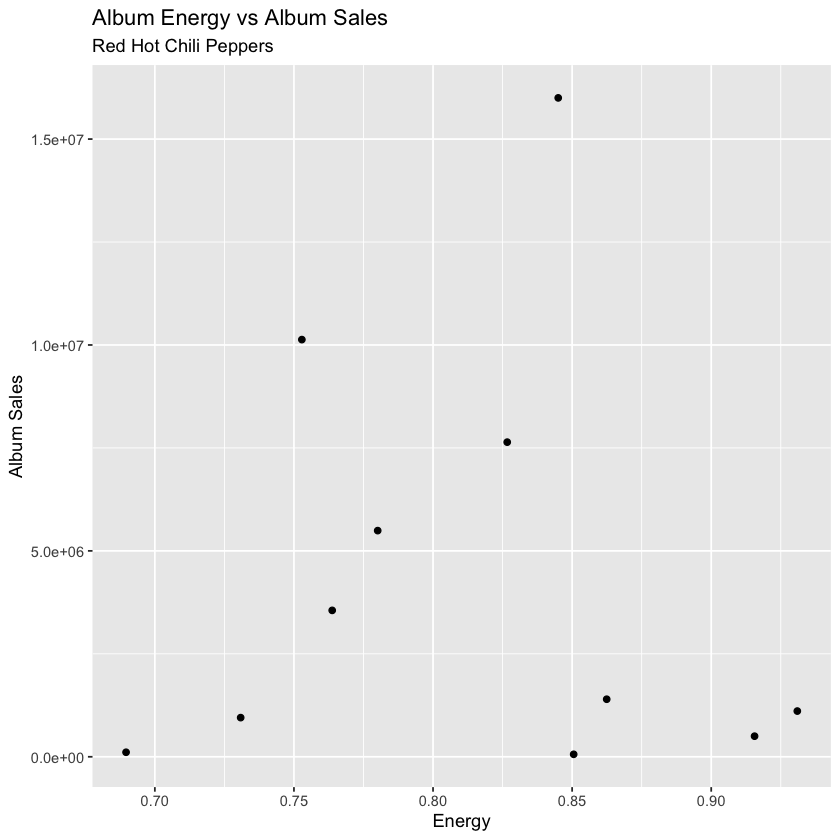

In [20]:
## Scatterplot energy vs sales
ggplot(sales.energy, aes(x = energy, y = sales)) +
  geom_point() +
  xlab("Energy") +
  ylab("Album Sales") +
  ggtitle("Album Energy vs Album Sales", subtitle = "Red Hot Chili Peppers")
## Below energy of 0.85, we see a positive relationship between album energy and
## sales. However, there is no relationship at very high energy levels.

In [21]:
cor(sales.energy$energy, sales.energy$sales)

[1] -0.05336852